In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
training_data = pd.read_csv('../data/train_u6lujuX.csv')
testing_data = pd.read_csv('../data/test_Y3wMUE5.csv')
%matplotlib inline
# training_data[training_data.apply(lambda x: x['Credit_History'] == 0 and x['Loan_Status'] == 'Y',axis = 1)]

In [68]:
training_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [60]:
training_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,NaN,NaN,NaN
50%,3812.500000,1188.500000,NaN,NaN,NaN
75%,5795.000000,2297.250000,NaN,NaN,NaN
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [11]:
training_data.groupby(['Loan_Status']).describe()

ApplicantIncome  CoapplicantIncome  Credit_History  \
Loan_Status                                                             
N           count       192.000000         192.000000      179.000000   
            mean       5446.078125        1877.807292        0.541899   
            std        6819.558528        4384.060103        0.499639   
            min         150.000000           0.000000        0.000000   
            25%        2885.000000           0.000000             NaN   
            50%        3833.500000         268.000000             NaN   
            75%        5861.250000        2273.750000             NaN   
            max       81000.000000       41667.000000        1.000000   
Y           count       422.000000         422.000000      385.000000   
            mean       5384.068720        1504.516398        0.981818   
            std        5765.441615        1924.754855        0.133782   
            min         210.000000           0.000000        0.000000   
            25%        2877.500000           0.000000             NaN   
            50%        3812.500000        1239.500000             NaN   
            75%        5771.500000        2297.250000             NaN   
            max       63337.000000       20000.000000        1.000000   

                   LoanAmount  Loan_Amount_Term  
Loan_Status                                      
N           count  181.000000        186.000000  
            mean   151.220994        344.064516  
            std     85.862783         69.238921  
            min      9.000000         36.000000  
            25%           NaN               NaN  
            50%           NaN               NaN  
            75%           NaN               NaN  
            max    570.000000        480.000000  
Y           count  411.000000        414.000000  
            mean   144.294404        341.072464  
            std     85.484607         63.247770  
            min     17.000000         12.000000  
            25%           NaN               NaN  
            50%           NaN               NaN  
            75%           NaN               NaN  
            max    700.000000        480.000000

In [87]:
training_data.isnull().sum(axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Credit_History_f      0
dtype: int64

In [101]:
testing_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [21]:
training_data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Loan_Status         N    Y
Credit_History_f          
0.0                82    7
1.0               110  415
Loan_Status              N         Y
Credit_History_f                    
0.0               0.921348  0.078652
1.0               0.209524  0.790476


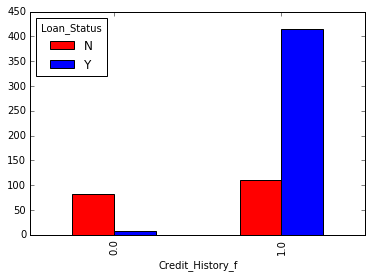

In [94]:
credit_loan = pd.crosstab(training_data['Credit_History_f'], training_data['Loan_Status'], margins=False)
print(credit_loan)
credit_loan_rate = credit_loan.apply(lambda row: row/row.sum(), axis=1)
print(credit_loan_rate)
credit_loan.plot(kind='bar', color = ["red", "blue"])

In [95]:
training_data[training_data['Credit_History'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Credit_History_f
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y,1.0
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N,1.0
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N,1.0
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y,1.0
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y,1.0
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N,1.0
86,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y,1.0
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N,1.0
117,LP001405,Male,Yes,1,Graduate,No,2214,1398.0,85.0,360.0,NaN,Urban,Y,1.0
125,LP001443,Female,No,0,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural,Y,1.0


In [89]:
testing_data[testing_data['Credit_History'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
12,LP001083,Male,No,3+,Graduate,No,4166,0,40.0,180.0,NaN,Urban
26,LP001163,Male,Yes,2,Graduate,No,4363,1250,140.0,360.0,NaN,Urban
28,LP001174,Male,Yes,0,Graduate,No,3772,833,57.0,360.0,NaN,Semiurban
45,LP001232,Male,Yes,0,Graduate,No,4260,3900,185.0,NaN,NaN,Urban
90,LP001475,Male,Yes,0,Graduate,Yes,3188,2286,130.0,360.0,NaN,Rural
99,LP001527,Male,Yes,3+,Graduate,No,6835,0,188.0,360.0,NaN,Semiurban
104,LP001558,Male,No,0,Graduate,No,2243,2233,107.0,360.0,NaN,Semiurban
115,LP001601,Male,No,3+,Graduate,No,4243,4123,157.0,360.0,NaN,Semiurban
139,LP001771,Female,No,3+,Graduate,No,4083,0,103.0,360.0,NaN,Semiurban


In [100]:
pd.pivot_table(training_data, values='LoanAmount', index=['Gender'], columns=['Credit_History'], aggfunc=np.average)

Credit_History,0.0,1.0
Gender,,
Female,NaN,NaN
Male,NaN,NaN


In [206]:
from sklearn.preprocessing import FunctionTransformer

def fill_nans(X, y=None):
    df = X.copy()
    
    df.drop('Loan_ID', axis=1, inplace=True)
    df['Credit_History'] = df['Credit_History'].fillna(1.0)
    df['Dependents'].fillna(0.0, inplace=True)
    
    df['Incomes'] = df['ApplicantIncome']+df['CoapplicantIncome']
    df.drop(['ApplicantIncome', 'CoapplicantIncome'], axis = 1, inplace=True)
    
    df['Education'] = df['Education'].apply(lambda edu: 1 if edu == 'Graduate' else 0)
    
    df['Gender'] = df['Gender'].apply(lambda gender: 0 if gender == 'Female' else 1) 
    
    df['Married'] = df['Married'].apply(lambda married: 1 if married == 'Yes' else 0) 
    
    df['Self_Employed'] = df['Self_Employed'].apply(lambda self_employed: 1 if self_employed == 'Yes' else 0)
    
    df['Loan_Status'] = df['Loan_Status'].apply(lambda loan_status: 1 if loan_status == 'Y' else 0)
    return df[FEATURE_COLUMNS]

fillna_transformer = FunctionTransformer(fill_nans, validate=False)
# training_df = fillna_transformer.transform(training_data)
# training_df.isnull().sum()

In [207]:
from sklearn.pipeline import Pipeline

FEATURE_COLUMNS = ['Credit_History', 'Gender', 'Married', 'Loan_Status']

def select_columns(X):
    return X[FEATURE_COLUMNS]

select_transformer = FunctionTransformer(select_columns, validate=False)

stage = {('fillna', fillna_transformer)}#, ('selectColumns', select_transformer)}


feature_process = Pipeline(stage)
# feature_process.set_params(selectColumns__cs=cs)
training_features = feature_process.transform(training_data)
# testing_features = feature_process.transform(testing_data)

training_features


,Credit_History,Gender,Married,Loan_Status
0,1.0,1,0,1
1,1.0,1,1,0
2,1.0,1,1,1
3,1.0,1,1,1
4,1.0,1,0,1
5,1.0,1,1,1
6,1.0,1,1,1
7,0.0,1,1,0
8,1.0,1,1,1
9,1.0,1,1,0
